<a href="https://colab.research.google.com/github/nizarmahi/PCVK_GANJIL_24-25/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama** : Mochammad Nizar Mahi

**Kelas** : TI-3F / 13

**NIM** : 2241721085

****
**PCVK JOBSHEET 6 | Histogram, Histogram equalization, Dithering**
****

# Import Library

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Histogram Citra

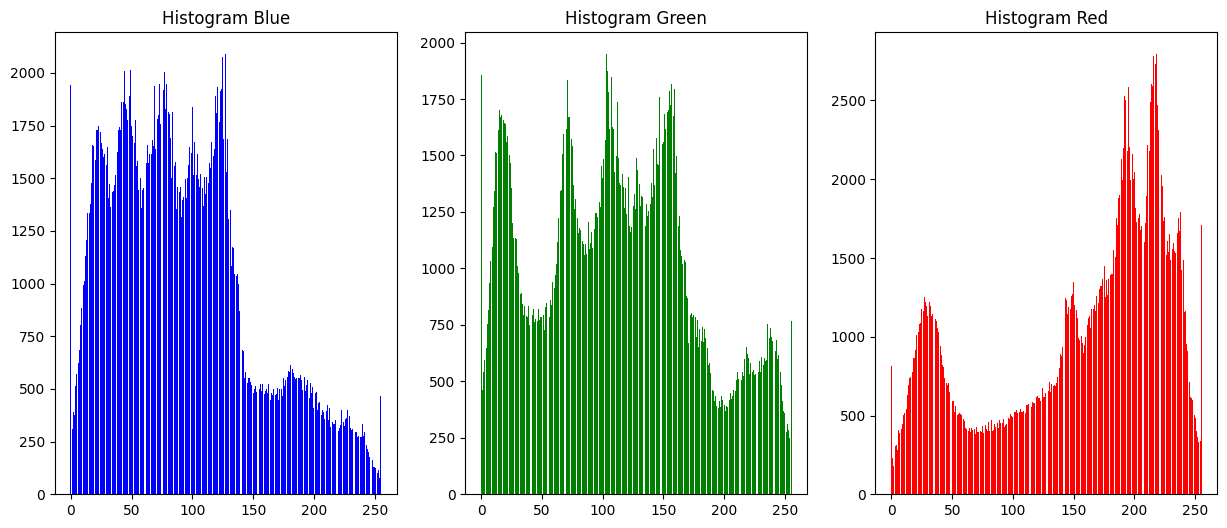

In [2]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

hist_b = cv.calcHist([image], [0], None, [256], [0, 256]).flatten()
hist_g = cv.calcHist([image], [1], None, [256], [0, 256]).flatten()
hist_r = cv.calcHist([image], [2], None, [256], [0, 256]).flatten()

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1), plt.bar(np.arange(256), hist_b, color="b"), plt.title('Histogram Blue')
plt.subplot(1, 3, 2), plt.bar(np.arange(256), hist_g, color="g"), plt.title('Histogram Green')
plt.subplot(1, 3, 3), plt.bar(np.arange(256), hist_r, color="r"), plt.title('Histogram Red')
plt.show()

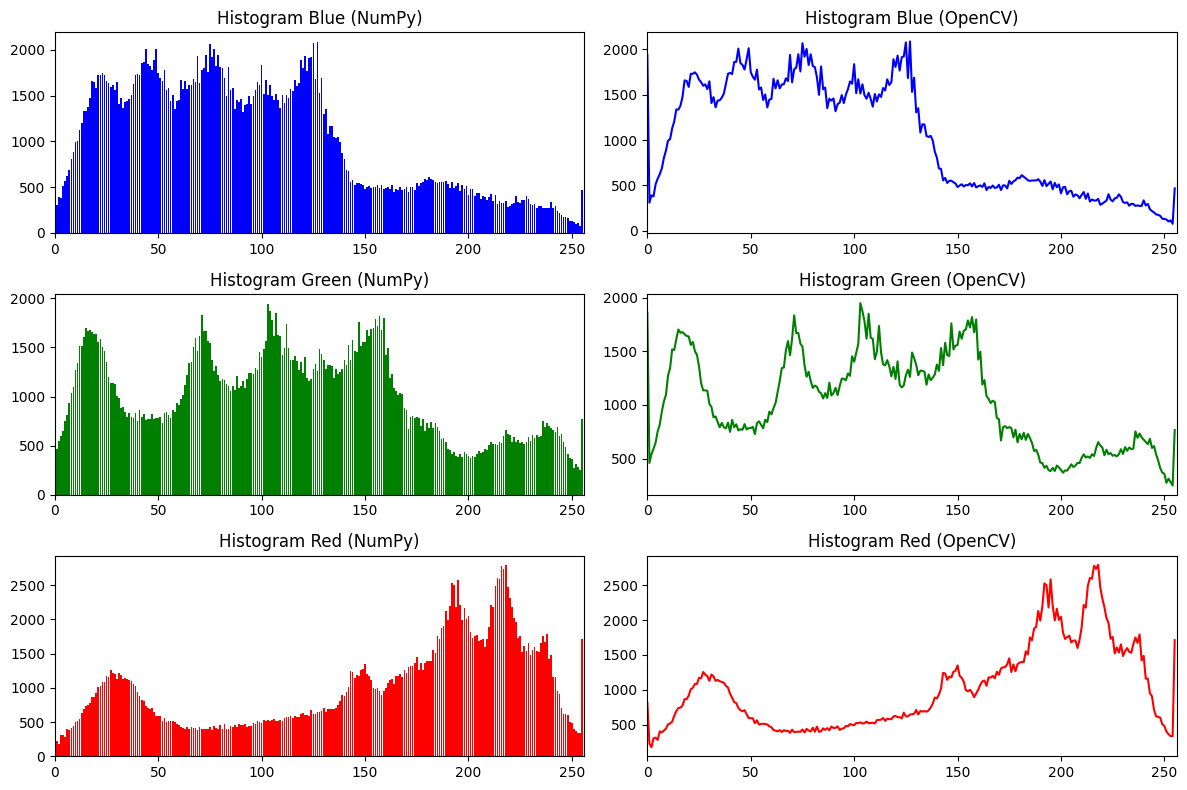

In [3]:
# Membaca citra
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Memisahkan channel B, G, R
b, g, r = cv.split(image)

# Menghitung histogram menggunakan numpy.histogram
hist_b_np, _ = np.histogram(b, bins=256, range=(0, 256))
hist_g_np, _ = np.histogram(g, bins=256, range=(0, 256))
hist_r_np, _ = np.histogram(r, bins=256, range=(0, 256))

# Histogram menggunakan OpenCV
hist_b_cv = cv.calcHist([image], [0], None, [256], [0, 256])
hist_g_cv = cv.calcHist([image], [1], None, [256], [0, 256])
hist_r_cv = cv.calcHist([image], [2], None, [256], [0, 256])

# Membuat plot untuk histogram dari numpy
plt.figure(figsize=(12, 8))

plt.subplot(321)
plt.bar(np.arange(256), hist_b_np, color='b')
plt.title('Histogram Blue (NumPy)')
plt.xlim([0, 256])

plt.subplot(322)
plt.plot(hist_b_cv, color='b')
plt.title('Histogram Blue (OpenCV)')
plt.xlim([0, 256])

plt.subplot(323)
plt.bar(np.arange(256), hist_g_np, color='g')
plt.title('Histogram Green (NumPy)')
plt.xlim([0, 256])

plt.subplot(324)
plt.plot(hist_g_cv, color='g')
plt.title('Histogram Green (OpenCV)')
plt.xlim([0, 256])

plt.subplot(325)
plt.bar(np.arange(256), hist_r_np, color='r')
plt.title('Histogram Red (NumPy)')
plt.xlim([0, 256])

plt.subplot(326)
plt.plot(hist_r_cv, color='r')
plt.title('Histogram Red (OpenCV)')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

# Histogram Equalization

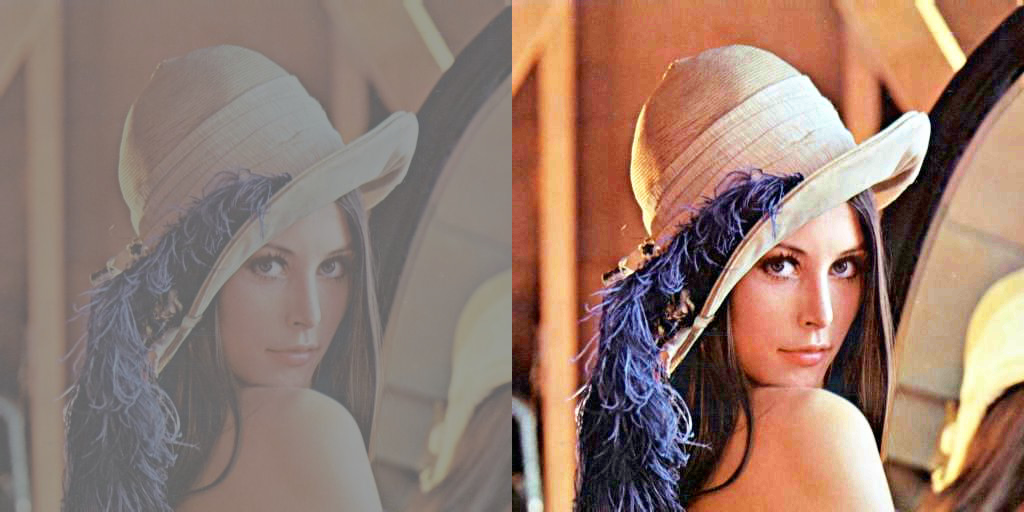

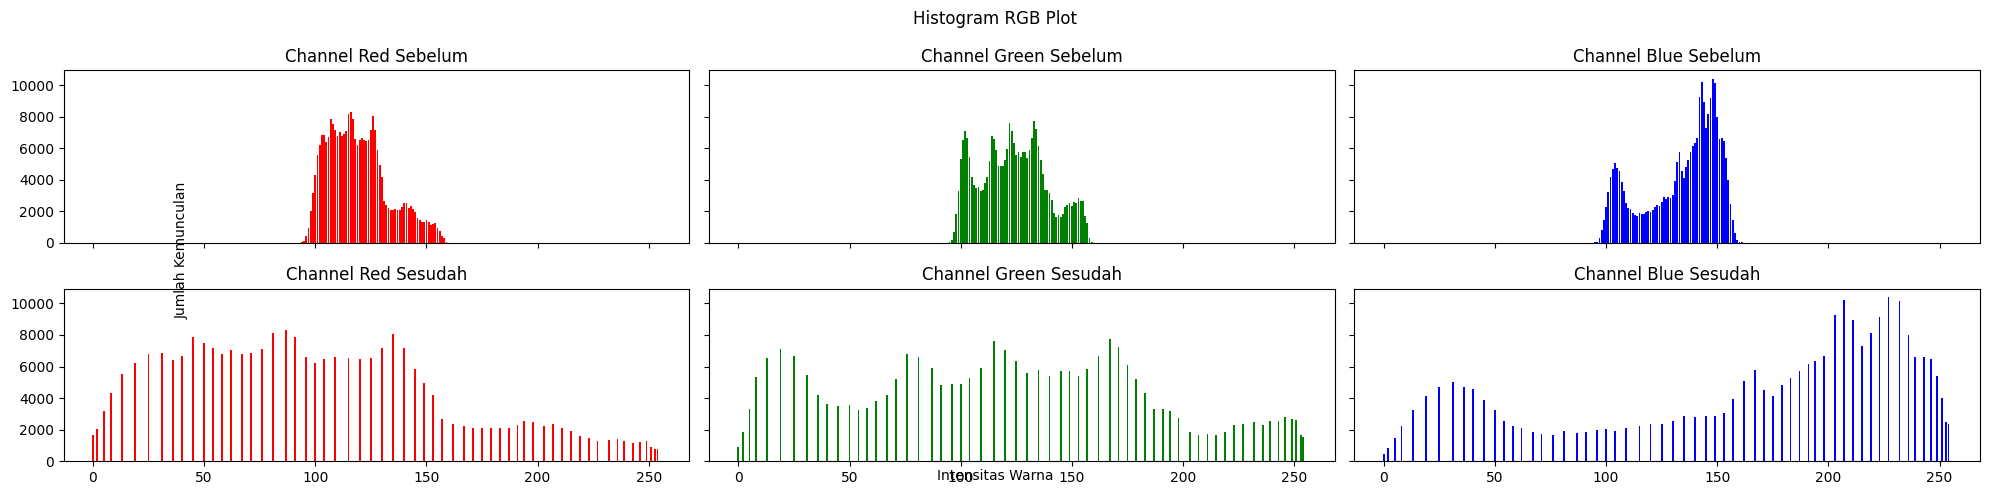

In [4]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Fungsi untuk menghitung histogram dari citra RGB
def calculate_histogram(image):
    histogram = np.zeros((3, 256))
    for channel in range(3):  # Untuk setiap channel (B, G, R)
        histogram[channel] = cv.calcHist([image], [channel], None, [256], [0, 256]).flatten()
    return histogram

# Histogram citra asli
histo_asli = calculate_histogram(image)

# Melakukan histogram equalization secara manual
img_array = image.flatten()
histogram_array, _ = np.histogram(img_array, bins=256, range=(0, 256))
num_pixels = img_array.size
normalized_histogram = histogram_array / num_pixels
cumulative_histogram = np.cumsum(normalized_histogram)
transform_map = np.floor(255 * cumulative_histogram).astype(np.uint8)

# Transformasi pixel values
equalized_img = transform_map[img_array]
image_eq = equalized_img.reshape(image.shape)

# Histogram citra setelah equalization
equal_histo = calculate_histogram(image_eq)

# Menampilkan gambar asli dan hasil histogram equalization
final_frame = cv.hconcat([image, image_eq])
cv2_imshow(final_frame)

# Menampilkan histogram sebelum dan sesudah equalization
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

colors = ['red', 'green', 'blue']
for i in range(3):
    axs[0, i].bar(np.arange(256), histo_asli[i], color=colors[i])
    axs[0, i].set_title(f'Channel {colors[i].capitalize()} Sebelum')
    axs[1, i].bar(np.arange(256), equal_histo[i], color=colors[i])
    axs[1, i].set_title(f'Channel {colors[i].capitalize()} Sesudah')

plt.tight_layout()
plt.show()


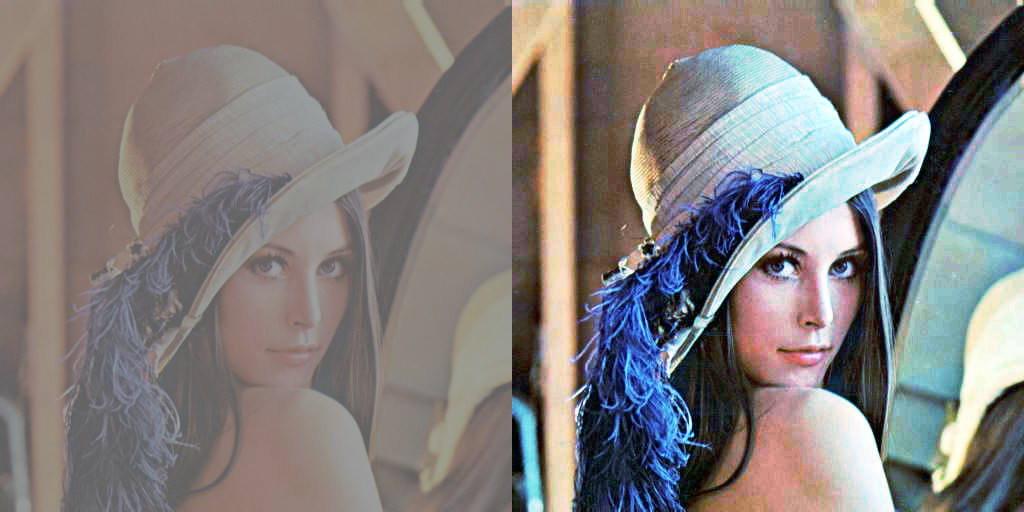

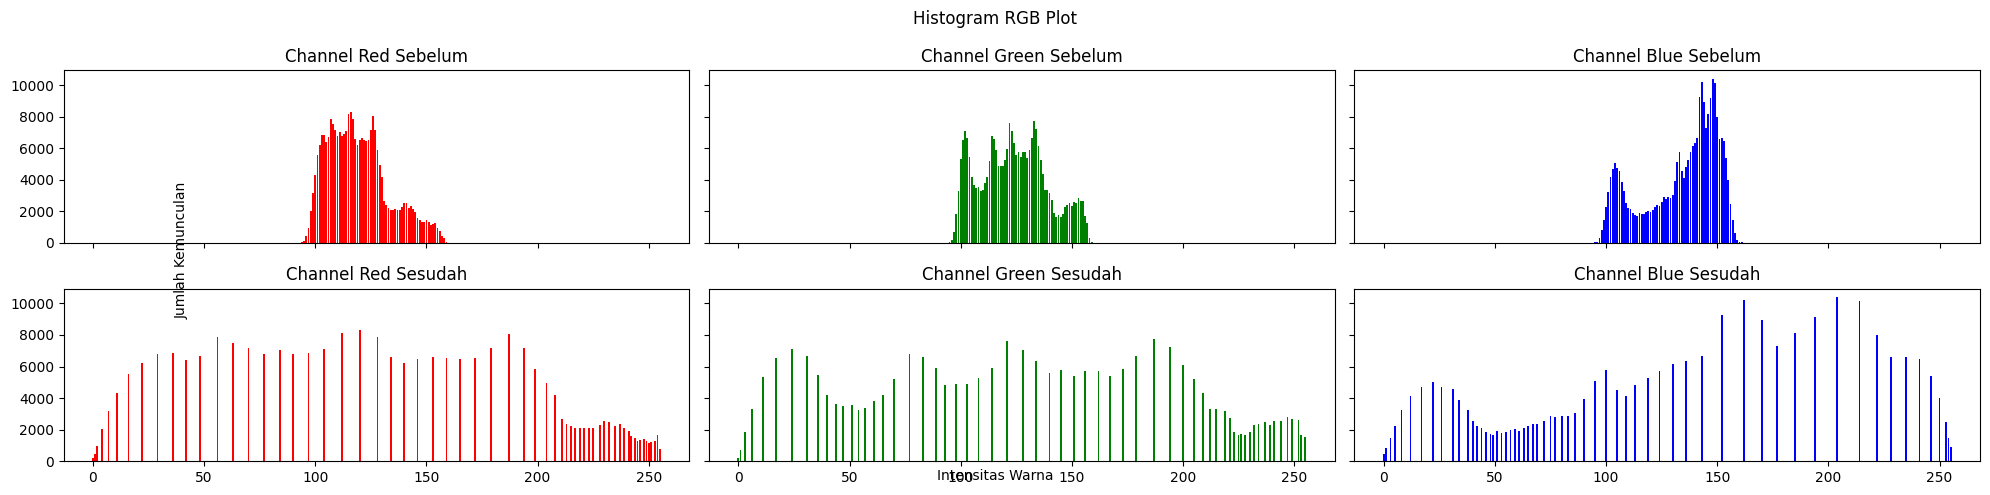

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Hanya jika menggunakan Google Colab

# Membaca gambar
img1_rgb = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
# img1_rgb = cv.cvtColor(img1, cv.COLOR_BGR2RGB)  # Mengonversi ke RGB

# Melakukan histogram equalization untuk setiap channel RGB
channels = cv.split(img1_rgb)
equalized_channels = [cv.equalizeHist(channel) for channel in channels]
img2_rgb = cv.merge(equalized_channels)

# Menampilkan gambar asli dan setelah histogram equalization
final_frame = cv.hconcat([img1_rgb, img2_rgb])
cv2_imshow(final_frame)

# Fungsi untuk menghitung histogram
def calculate_histogram(image):
    histogram = np.zeros((3, 256))
    for i in range(3):
        histogram[i] = cv.calcHist([image], [i], None, [256], [0, 256]).flatten()
    return histogram

# Menghitung histogram sebelum dan sesudah equalization
histo_asli = calculate_histogram(img1_rgb)
histo_equalized = calculate_histogram(img2_rgb)

# Menampilkan histogram sebelum dan sesudah equalization
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

colors = ['red', 'green', 'blue']
for i in range(3):
    axs[0, i].bar(np.arange(256), histo_asli[i], color=colors[i])
    axs[0, i].set_title(f'Channel {colors[i].capitalize()} Sebelum')
    axs[1, i].bar(np.arange(256), histo_equalized[i], color=colors[i])
    axs[1, i].set_title(f'Channel {colors[i].capitalize()} Sesudah')

plt.tight_layout()
plt.show()


# Pemetaan 16 juta warna RGB ke dalam 8 warna saja

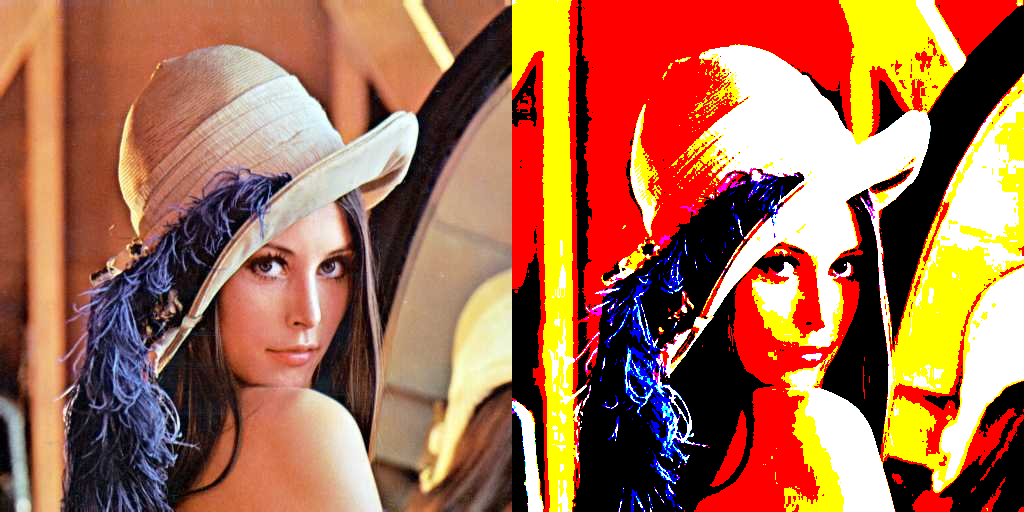

In [6]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [
      [0, 0, 0], # Hitam
      [255, 0, 0], # Merah
      [0, 255, 0], # Hijau
      [255, 255, 0], # Kuning
      [0, 0, 255], # Biru
      [255, 0, 255], # Magenta
      [0, 255, 255], # Cyan
      [255, 255, 255] # Putih
    ]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)

final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

# Dithering Floyd and Steinberg

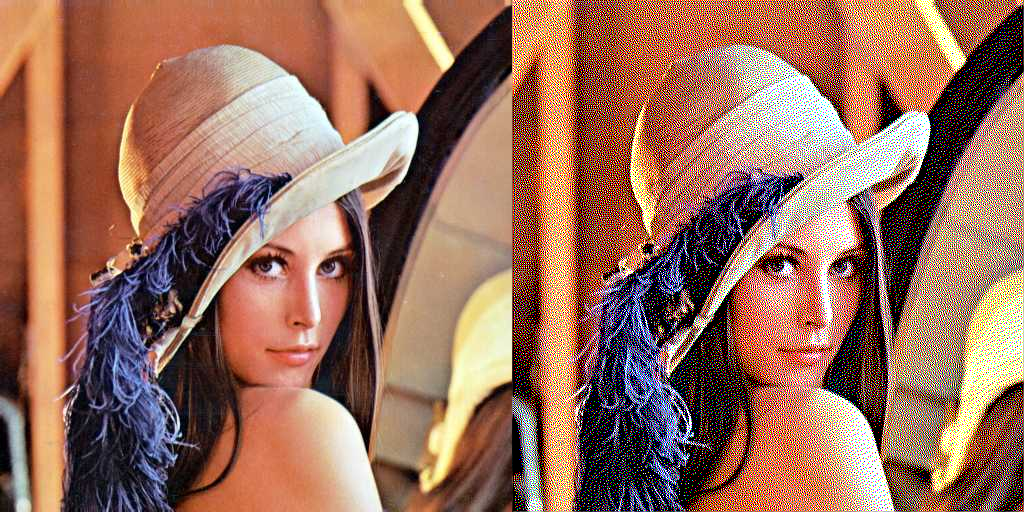

In [7]:
# Fungsi untuk membatasi nilai pixel dalam rentang [0, 255]
def threshold(nilai):
    if nilai > 255:
        return 255
    elif nilai < 0:
        return 0
    return nilai

# Membaca gambar input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')  # Ganti path sesuai lokasi gambar Anda
height, width = img.shape[:2]

# Membuat salinan gambar untuk hasil dithering
dithered_img = img.copy()

# Proses Floyd-Steinberg Dithering
for y in range(height - 1):
    for x in range(1, width - 1):
        # Mendapatkan nilai pixel RGB asli
        old_pixel_blue = dithered_img[y, x, 0]
        old_pixel_green = dithered_img[y, x, 1]
        old_pixel_red = dithered_img[y, x, 2]

        # Menentukan nilai baru pixel
        new_pixel_blue = np.round(old_pixel_blue / 255.0) * 255
        new_pixel_green = np.round(old_pixel_green / 255.0) * 255
        new_pixel_red = np.round(old_pixel_red / 255.0) * 255

        # Memperbarui pixel pada gambar
        dithered_img[y, x, 0] = new_pixel_blue
        dithered_img[y, x, 1] = new_pixel_green
        dithered_img[y, x, 2] = new_pixel_red

        # Menghitung kesalahan (error) untuk setiap channel
        error_blue = old_pixel_blue - new_pixel_blue
        error_green = old_pixel_green - new_pixel_green
        error_red = old_pixel_red - new_pixel_red

        # Menyebarkan kesalahan ke piksel tetangga berdasarkan Floyd-Steinberg weights
        if x + 1 < width:
            dithered_img[y, x + 1, 0] = threshold(dithered_img[y, x + 1, 0] + error_blue * 7 / 16)
            dithered_img[y, x + 1, 1] = threshold(dithered_img[y, x + 1, 1] + error_green * 7 / 16)
            dithered_img[y, x + 1, 2] = threshold(dithered_img[y, x + 1, 2] + error_red * 7 / 16)

        if y + 1 < height:
            if x > 0:
                dithered_img[y + 1, x - 1, 0] = threshold(dithered_img[y + 1, x - 1, 0] + error_blue * 3 / 16)
                dithered_img[y + 1, x - 1, 1] = threshold(dithered_img[y + 1, x - 1, 1] + error_green * 3 / 16)
                dithered_img[y + 1, x - 1, 2] = threshold(dithered_img[y + 1, x - 1, 2] + error_red * 3 / 16)

            dithered_img[y + 1, x, 0] = threshold(dithered_img[y + 1, x, 0] + error_blue * 5 / 16)
            dithered_img[y + 1, x, 1] = threshold(dithered_img[y + 1, x, 1] + error_green * 5 / 16)
            dithered_img[y + 1, x, 2] = threshold(dithered_img[y + 1, x, 2] + error_red * 5 / 16)

            if x + 1 < width:
                dithered_img[y + 1, x + 1, 0] = threshold(dithered_img[y + 1, x + 1, 0] + error_blue * 1 / 16)
                dithered_img[y + 1, x + 1, 1] = threshold(dithered_img[y + 1, x + 1, 1] + error_green * 1 / 16)
                dithered_img[y + 1, x + 1, 2] = threshold(dithered_img[y + 1, x + 1, 2] + error_red * 1 / 16)

# Menampilkan hasil dithering
final_frame = cv.hconcat((img, dithered_img))
cv2_imshow(final_frame)


# Histogram equalization Gray & Dithering Floyd and Steinberg

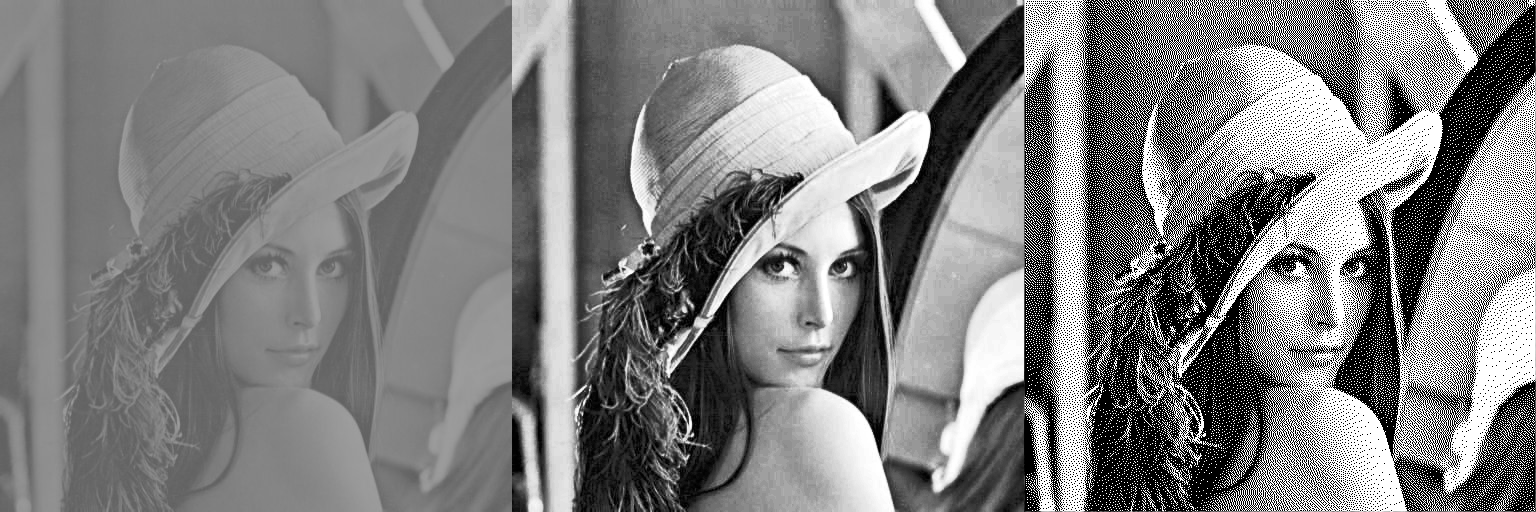

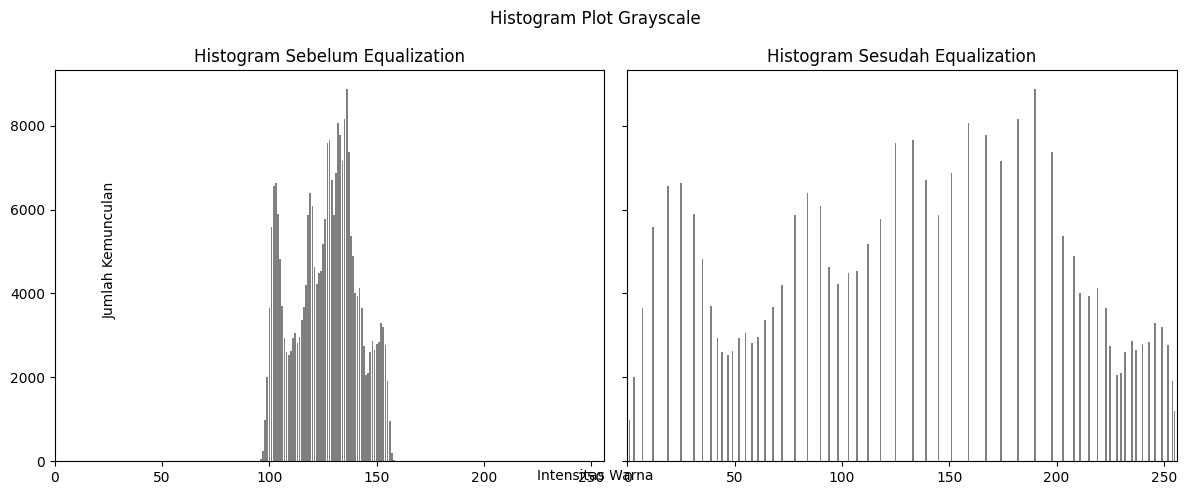

In [13]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow  # Jika Anda menggunakan Google Colab

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Mengubah gambar menjadi grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Melakukan Histogram Equalization
equalized_img = cv.equalizeHist(gray_img)

# Fungsi untuk melakukan Floyd-Steinberg Dithering
def floyd_steinberg_dithering(img):
    # Mendapatkan ukuran gambar
    height, width = img.shape

    # Salinan gambar untuk hasil dithering
    dithered_img = img.copy()

    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = dithered_img[y, x]
            new_pixel = np.round(old_pixel / 255.0) * 255
            dithered_img[y, x] = new_pixel

            # Menghitung error
            error = old_pixel - new_pixel

            # Menyebarkan kesalahan ke piksel tetangga berdasarkan Floyd-Steinberg weights
            dithered_img[y, x + 1] = np.clip(dithered_img[y, x + 1] + error * 7 / 16, 0, 255)
            dithered_img[y + 1, x - 1] = np.clip(dithered_img[y + 1, x - 1] + error * 3 / 16, 0, 255)
            dithered_img[y + 1, x] = np.clip(dithered_img[y + 1, x] + error * 5 / 16, 0, 255)
            dithered_img[y + 1, x + 1] = np.clip(dithered_img[y + 1, x + 1] + error * 1 / 16, 0, 255)

    return dithered_img

# Menerapkan Floyd-Steinberg Dithering pada hasil Histogram Equalization
dithered_img = floyd_steinberg_dithering(equalized_img)

# Menampilkan hasil sebelum dan sesudah
final_frame = cv.hconcat([gray_img, equalized_img, dithered_img])

# Menampilkan hasil
cv2_imshow(final_frame)

# Menampilkan histogram sebelum dan sesudah equalization
fig, axs = plt.subplots(1, 2, figsize=[12, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Plot Grayscale')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Menggunakan bar untuk menampilkan histogram
axs[0].bar(np.arange(256), histo_asli, color="gray")
axs[0].set_title('Histogram Sebelum Equalization')
axs[0].set_xlim([0, 256])

axs[1].bar(np.arange(256), histo_equalized, color="gray")
axs[1].set_title('Histogram Sesudah Equalization')
axs[1].set_xlim([0, 256])

plt.tight_layout()
plt.show()

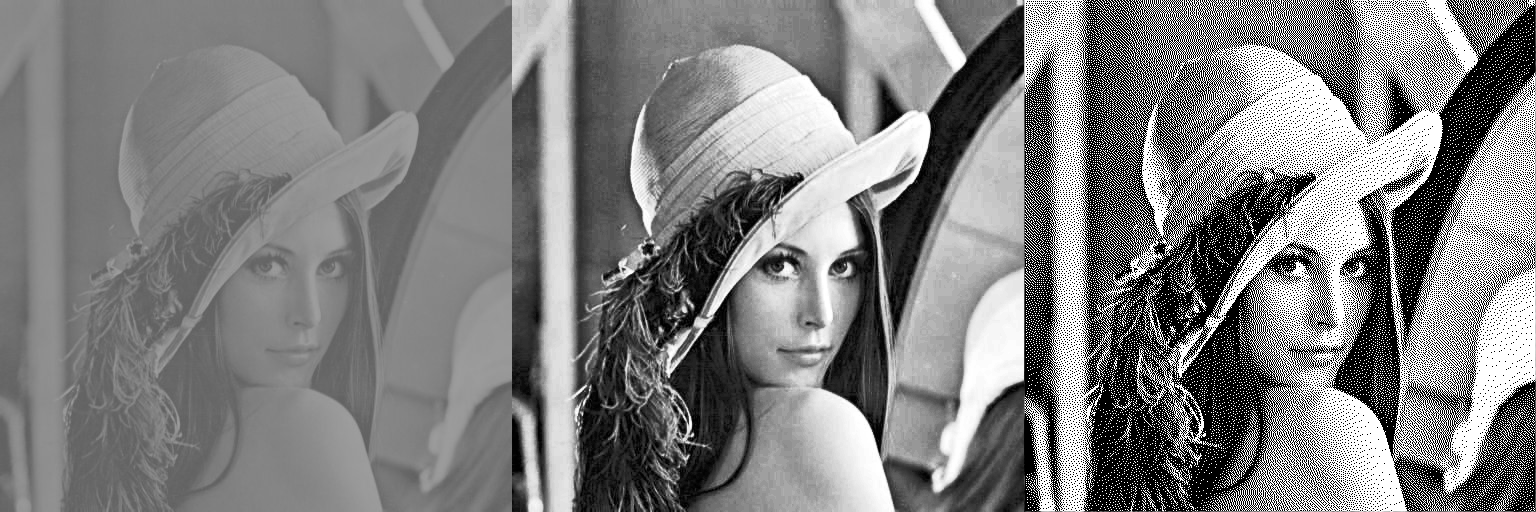

In [12]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow  # Jika Anda menggunakan Google Colab

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Mengubah gambar menjadi grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Melakukan Histogram Equalization
equalized_img = cv.equalizeHist(gray_img)

# Fungsi untuk melakukan Floyd-Steinberg Dithering
def floyd_steinberg_dithering(img):
    # Mendapatkan ukuran gambar
    height, width = img.shape

    # Salinan gambar untuk hasil dithering
    dithered_img = img.copy()

    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = dithered_img[y, x]
            new_pixel = np.round(old_pixel / 255.0) * 255
            dithered_img[y, x] = new_pixel

            # Menghitung error
            error = old_pixel - new_pixel

            # Menyebarkan kesalahan ke piksel tetangga berdasarkan Floyd-Steinberg weights
            dithered_img[y, x + 1] = np.clip(dithered_img[y, x + 1] + error * 7 / 16, 0, 255)
            dithered_img[y + 1, x - 1] = np.clip(dithered_img[y + 1, x - 1] + error * 3 / 16, 0, 255)
            dithered_img[y + 1, x] = np.clip(dithered_img[y + 1, x] + error * 5 / 16, 0, 255)
            dithered_img[y + 1, x + 1] = np.clip(dithered_img[y + 1, x + 1] + error * 1 / 16, 0, 255)

    return dithered_img

# Menerapkan Floyd-Steinberg Dithering pada hasil Histogram Equalization
dithered_img = floyd_steinberg_dithering(equalized_img)

# Menampilkan hasil sebelum dan sesudah
final_frame = cv.hconcat([gray_img, equalized_img, dithered_img])

# Menampilkan hasil
cv2_imshow(final_frame)